https://courses.edx.org/courses/course-v1:MITx+15.071x_3+1T2016/courseware/3372864201764d6d9f63931920e5152e/ab08d73980f046479d3bcd105a55b0c2/

In [2]:

gerber = read.csv("gerber.csv")

str(gerber)

table(gerber$control)

mean(gerber$voting)


'data.frame':	344084 obs. of  8 variables:
 $ sex      : int  0 1 1 1 0 1 0 0 1 0 ...
 $ yob      : int  1941 1947 1982 1950 1951 1959 1956 1981 1968 1967 ...
 $ voting   : int  0 0 1 1 1 1 1 0 0 0 ...
 $ hawthorne: int  0 0 1 1 1 0 0 0 0 0 ...
 $ civicduty: int  1 1 0 0 0 0 0 0 0 0 ...
 $ neighbors: int  0 0 0 0 0 0 0 0 0 0 ...
 $ self     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ control  : int  0 0 0 0 0 1 1 1 1 1 ...



     0      1 
152841 191243 

[1] 0.3158996

In [19]:
table(gerber$voting, gerber$neighbors)


   
         0      1
  0 211625  23763
  1  94258  14438

In [14]:
12021/(12021+26197)

[1] 0.3145377

In [16]:
12316/(12316+25888)

[1] 0.3223746

In [18]:
13191/(13191+25027)

[1] 0.3451515

In [20]:
14438/(14438+23763)

[1] 0.3779482

In [21]:
tapply(gerber$voting, gerber$civicduty, mean)

0         1 
0.3160698 0.3145377

In [26]:
gerberLog = glm(voting~hawthorne+civicduty+self+neighbors, data = gerber, family = binomial)

In [27]:
summary(gerberLog)


Call:
glm(formula = voting ~ hawthorne + civicduty + self + neighbors, 
    family = binomial, data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9744  -0.8691  -0.8389   1.4586   1.5590  

Coefficients:
             Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -0.863358   0.005006 -172.459  < 2e-16 ***
hawthorne    0.120477   0.012037   10.009  < 2e-16 ***
civicduty    0.084368   0.012100    6.972 3.12e-12 ***
self         0.222937   0.011867   18.786  < 2e-16 ***
neighbors    0.365092   0.011679   31.260  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428090  on 344079  degrees of freedom
AIC: 428100

Number of Fisher Scoring iterations: 4


In [29]:
predGerber1 = predict(gerberLog, type = "response")

In [42]:
t = table(gerber$voting,predGerber1>0.5)
t

   
     FALSE
  0 235388
  1 108696

In [43]:
235388/sum(t)

[1] 0.6841004

In [44]:
0.541957777751944

[1] 0.5419578

In [45]:
library(ROCR)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [46]:
ROCRPred = prediction(predGerber1,gerber$voting)

In [47]:
auc = as.numeric(performance(ROCRPred,"auc")@y.values)

In [48]:
auc

[1] 0.5308461

In [51]:
1-mean(gerber$voting)

[1] 0.6841004

In [53]:
library("rpart")

In [54]:
library("rpart.plot")

Warning message:
: package ‘rpart.plot’ was built under R version 3.3.0

In [55]:
CARTmodel = rpart(voting ~ civicduty + hawthorne + self + neighbors, data=gerber)

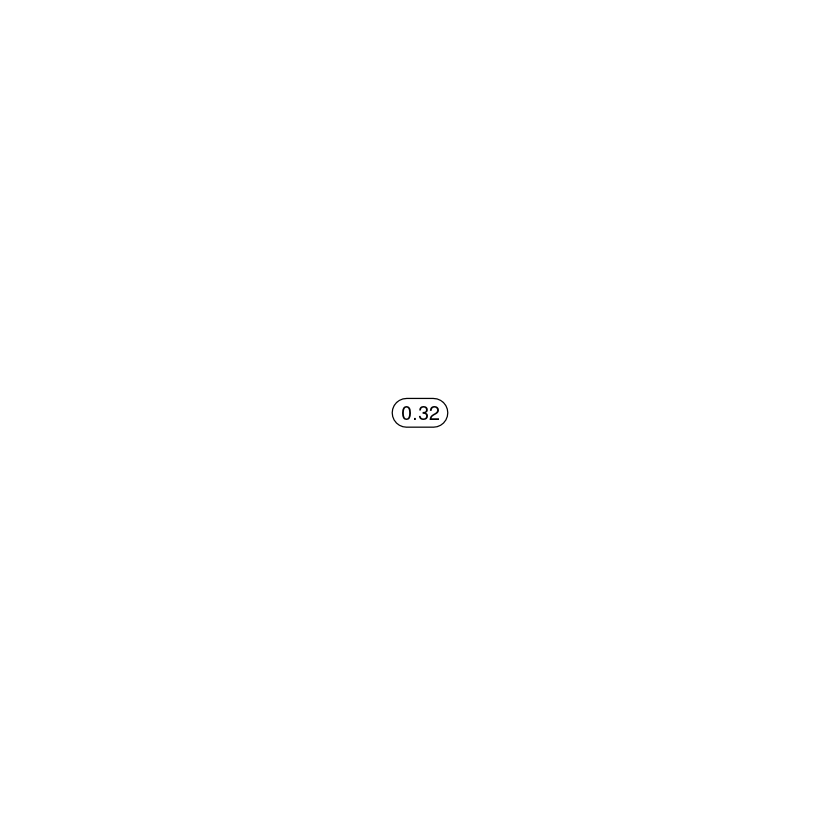

In [58]:
prp(CARTmodel)

In [59]:
CARTmodel2 = rpart(voting ~ civicduty + hawthorne + self + neighbors, data=gerber, cp=0.0)

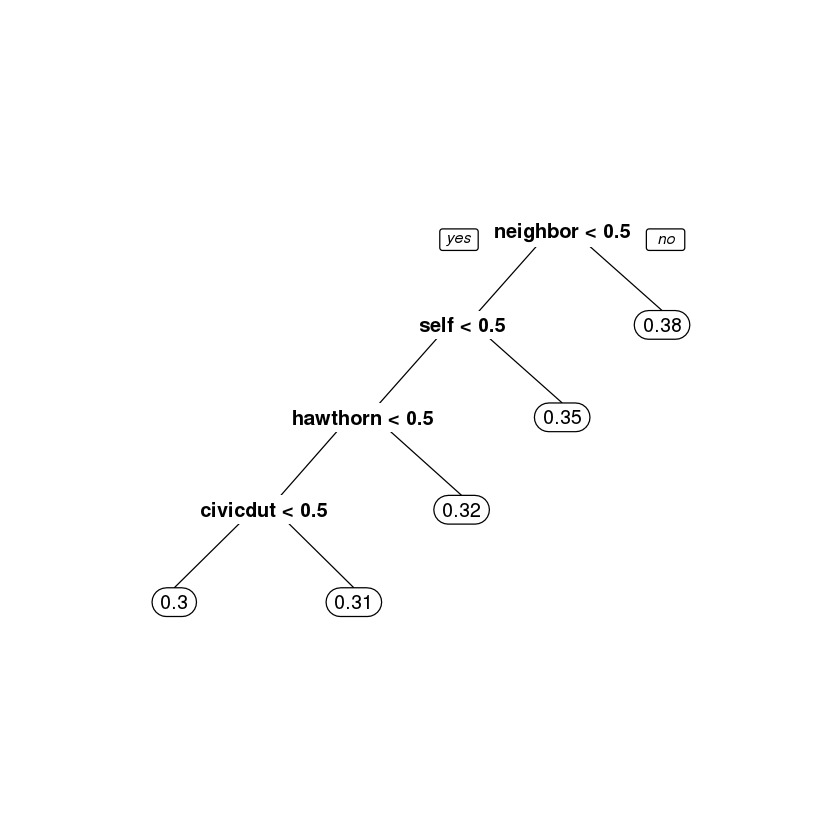

In [60]:
prp(CARTmodel2)

In [61]:
CARTmodel3 = rpart(voting ~ civicduty + hawthorne + self + neighbors + sex, data=gerber, cp=0.0)

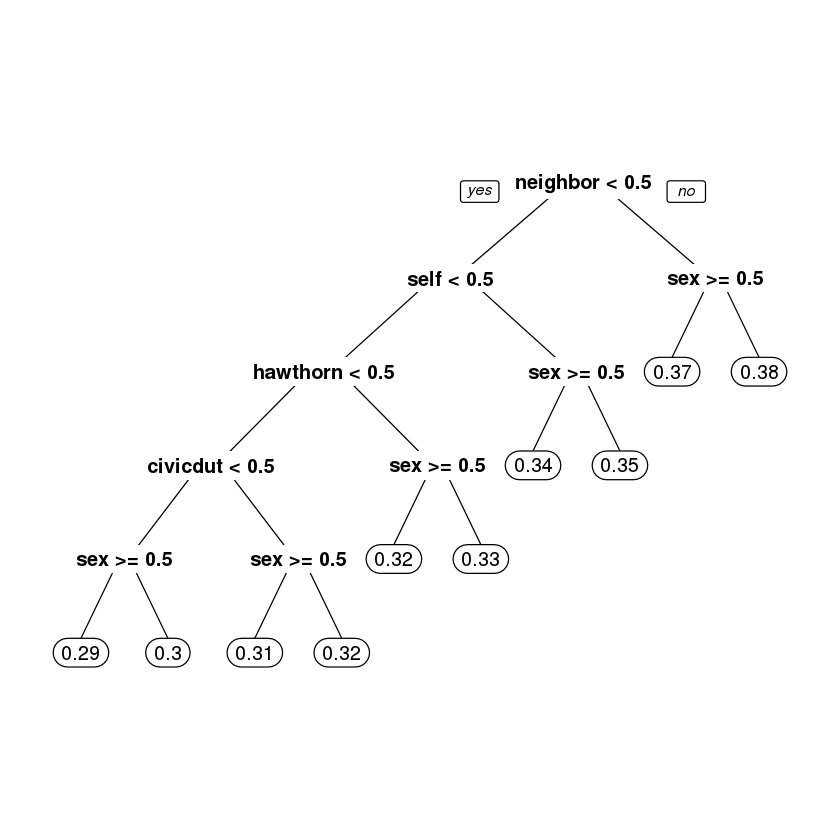

In [62]:
prp(CARTmodel3)

In [63]:
CARTcontrol = rpart(voting ~ control, data=gerber, cp=0.0)

In [64]:
CARTgender = rpart(voting ~ control+sex, data=gerber, cp=0.0)

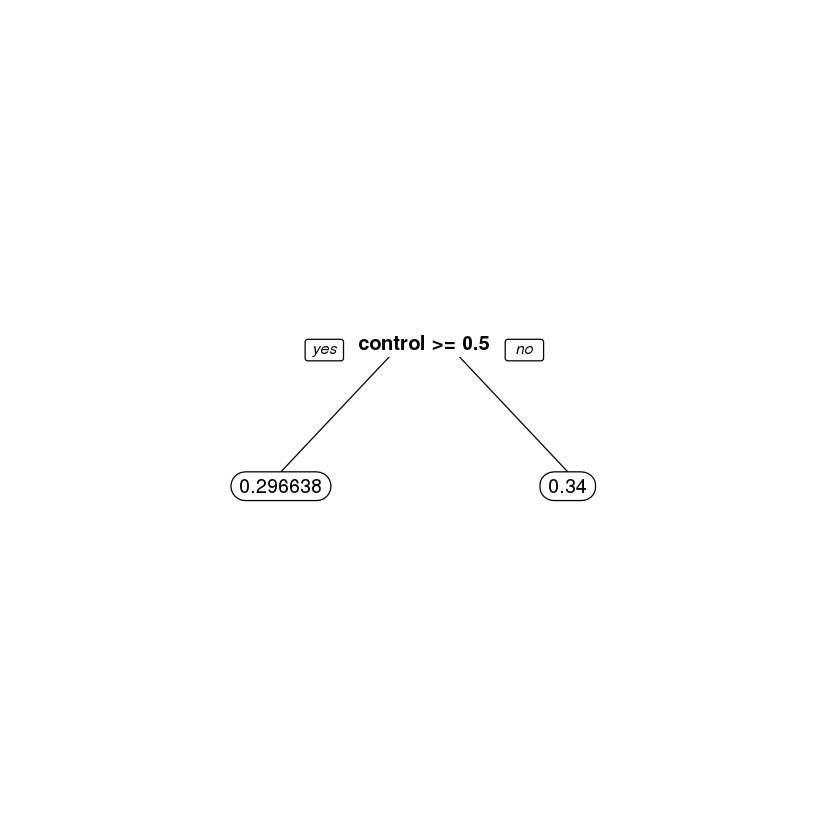

In [67]:
prp(CARTcontrol,digits = 6)

In [68]:
abs(0.296638-0.34)

[1] 0.043362

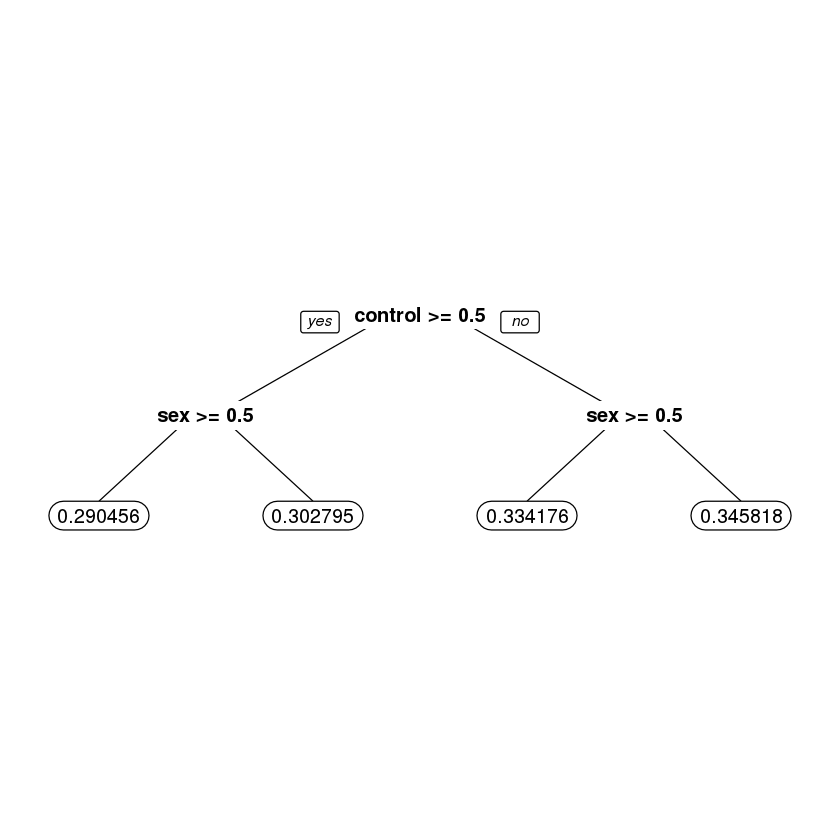

In [69]:
prp(CARTgender, digits = 6)

In [70]:
abs(0.34-0.345818)

[1] 0.005818

In [71]:
abs(0.34-0.334176)

[1] 0.005824

In [72]:
gerberLog2 = glm(voting~control+sex, data = gerber, family = binomial)

In [73]:
summary(gerberLog2)


Call:
glm(formula = voting ~ control + sex, family = binomial, data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9220  -0.9012  -0.8290   1.4564   1.5717  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.635538   0.006511 -97.616  < 2e-16 ***
control     -0.200142   0.007364 -27.179  < 2e-16 ***
sex         -0.055791   0.007343  -7.597 3.02e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428443  on 344081  degrees of freedom
AIC: 428449

Number of Fisher Scoring iterations: 4


In [75]:
Possibilities = data.frame(sex=c(0,0,1,1),control=c(0,1,0,1))
predict(gerberLog2, newdata=Possibilities, type="response")

1         2         3         4 
0.3462559 0.3024455 0.3337375 0.2908065

In [76]:
Possibilities

,sex,control
1,0,0
2,0,1
3,1,0
4,1,1


In [77]:
abs(0.290806452512016-0.290456)

[1] 0.0003504525

In [78]:
LogModel2 = glm(voting ~ sex + control + sex:control, data=gerber, family="binomial")

In [79]:
summary(LogModel2)


Call:
glm(formula = voting ~ sex + control + sex:control, family = "binomial", 
    data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9213  -0.9019  -0.8284   1.4573   1.5724  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.637471   0.007603 -83.843  < 2e-16 ***
sex         -0.051888   0.010801  -4.804 1.55e-06 ***
control     -0.196553   0.010356 -18.980  < 2e-16 ***
sex:control -0.007259   0.014729  -0.493    0.622    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428442  on 344080  degrees of freedom
AIC: 428450

Number of Fisher Scoring iterations: 4


In [80]:
predict(LogModel2, newdata=Possibilities, type="response")

1         2         3         4 
0.3458183 0.3027947 0.3341757 0.2904558

In [81]:
abs(0.290455779247779-0.290456)

[1] 2.207522e-07